<a href="https://colab.research.google.com/github/hamza-alkaabneh/project/blob/main/lobani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)# New Section

# New Section

In [182]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('Mall_Customers.csv')

df = df.drop(columns=['CustomerID'])




In [183]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [184]:
print(pd.DataFrame(scaled_data, columns=features).head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


In [185]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data)


In [186]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f" ( without noise): {n_clusters}")




 ( without noise): 6


In [187]:
n_noise = list(labels).count(-1)

print(f" noise: {n_noise}")


 noise: 60


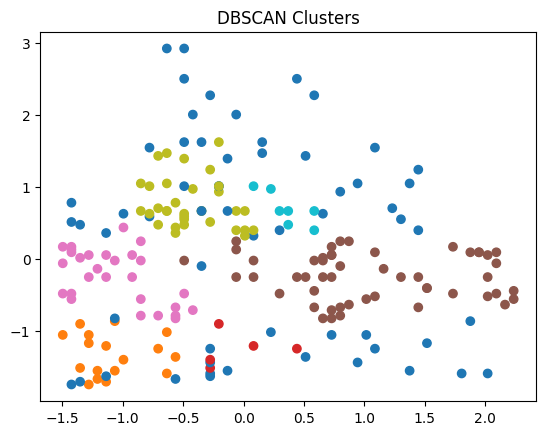

In [188]:
import matplotlib.pyplot as plt

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='tab10')
plt.title('DBSCAN Clusters')
plt.show()


In [189]:
for eps in [0.4, 0.6, 0.8, 1.1]:
    for min_samples in [4, 6, 10]:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        lbls = model.fit_predict(scaled_data)
        n_clusters = len(set(lbls)) - (1 if -1 in lbls else 0)
        n_noise = list(lbls).count(-1)
        print(f"eps={eps}, min_samples={min_samples} ➜ clusters: {n_clusters}, noise: {n_noise}")


eps=0.4, min_samples=4 ➜ clusters: 8, noise: 73
eps=0.4, min_samples=6 ➜ clusters: 6, noise: 110
eps=0.4, min_samples=10 ➜ clusters: 2, noise: 170
eps=0.6, min_samples=4 ➜ clusters: 3, noise: 18
eps=0.6, min_samples=6 ➜ clusters: 5, noise: 34
eps=0.6, min_samples=10 ➜ clusters: 4, noise: 66
eps=0.8, min_samples=4 ➜ clusters: 1, noise: 5
eps=0.8, min_samples=6 ➜ clusters: 1, noise: 6
eps=0.8, min_samples=10 ➜ clusters: 1, noise: 23
eps=1.1, min_samples=4 ➜ clusters: 1, noise: 0
eps=1.1, min_samples=6 ➜ clusters: 1, noise: 0
eps=1.1, min_samples=10 ➜ clusters: 1, noise: 3


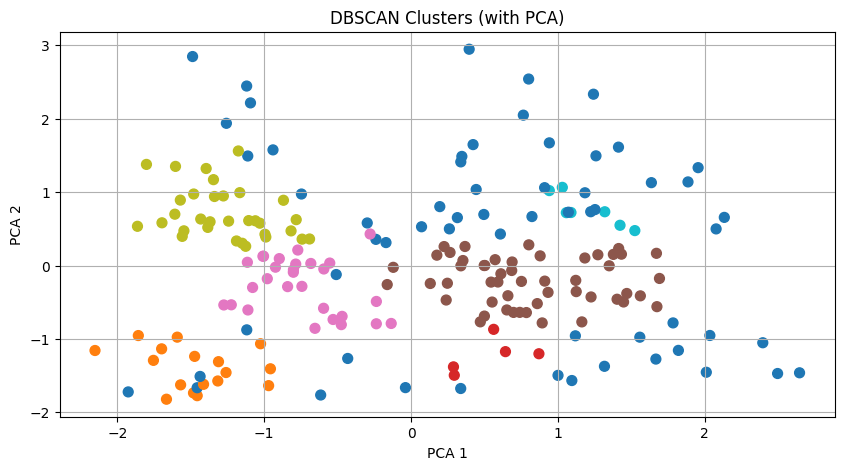

In [190]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 5))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab10', s=50)
plt.title('DBSCAN Clusters (with PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [191]:
eps_values = [0.3, 0.4, 0.5, 0.6, 0.8, 1.0]
min_samples_values = [3, 4, 5, 6, 8, 10]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            silhouette = silhouette_score(scaled_data, labels)
        else:
            silhouette = None
            results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette_score': silhouette
        })

results_df = pd.DataFrame(results)

print(results_df.sort_values(by=['n_clusters', 'silhouette_score'], ascending=[False, False]).head(10))


    eps  min_samples  n_clusters  n_noise silhouette_score
2   0.8            3           1        3             None
3   0.8            4           1        5             None
4   0.8            5           1        6             None
5   0.8            6           1        6             None
6   0.8            8           1       14             None
7   0.8           10           1       23             None
8   1.0            3           1        1             None
9   1.0            4           1        1             None
10  1.0            5           1        2             None
11  1.0            6           1        3             None


In [192]:
filtered_df = results_df.dropna(subset=['silhouette_score'])
best_row = filtered_df.sort_values(
       by=['n_clusters', 'n_noise', 'silhouette_score'],
       ascending=[False, False, False]
   ).head(1)

print(best_row)
print(f"eps = {best_row['eps']}, min_samples = {best_row['min_samples']}")
print(f" = {best_row['n_clusters']}")
print(f" = {best_row['n_noise']}")
print(f" = {best_row['silhouette_score']}")





Empty DataFrame
Columns: [eps, min_samples, n_clusters, n_noise, silhouette_score]
Index: []
eps = Series([], Name: eps, dtype: float64), min_samples = Series([], Name: min_samples, dtype: int64)
 = Series([], Name: n_clusters, dtype: int64)
 = Series([], Name: n_noise, dtype: int64)
 = Series([], Name: silhouette_score, dtype: object)


Kmeans++

In [193]:
data = pd.read_csv('Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [194]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [195]:
from sklearn.cluster import KMeans

kmeans_random = KMeans(n_clusters=5, init='random', random_state=42)
kmeans_random.fit(X_scaled)
labels_random = kmeans_random.labels_

In [196]:
kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_plus.fit(X_scaled)
print(kmeans_plus.labels_)
labels_plus = kmeans_plus.labels_
print(labels_plus)


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [197]:
from sklearn.metrics import silhouette_score
#kmeans
print("== KMeans  ==")
print("Inertia:", kmeans_random.inertia_)
print(" :", kmeans_random.n_iter_)
print("Silhouette:", silhouette_score(X_scaled, labels_random))

#kmeans++
print("\n== KMeans++ ==")
print("Inertia:", kmeans_plus.inertia_)
print(" :", kmeans_plus.n_iter_)
print("Silhouette:", silhouette_score(X_scaled, labels_plus))


== KMeans  ==
Inertia: 65.56840815571681
 : 10
Silhouette: 0.5546571631111091

== KMeans++ ==
Inertia: 65.56840815571681
 : 4
Silhouette: 0.5546571631111091


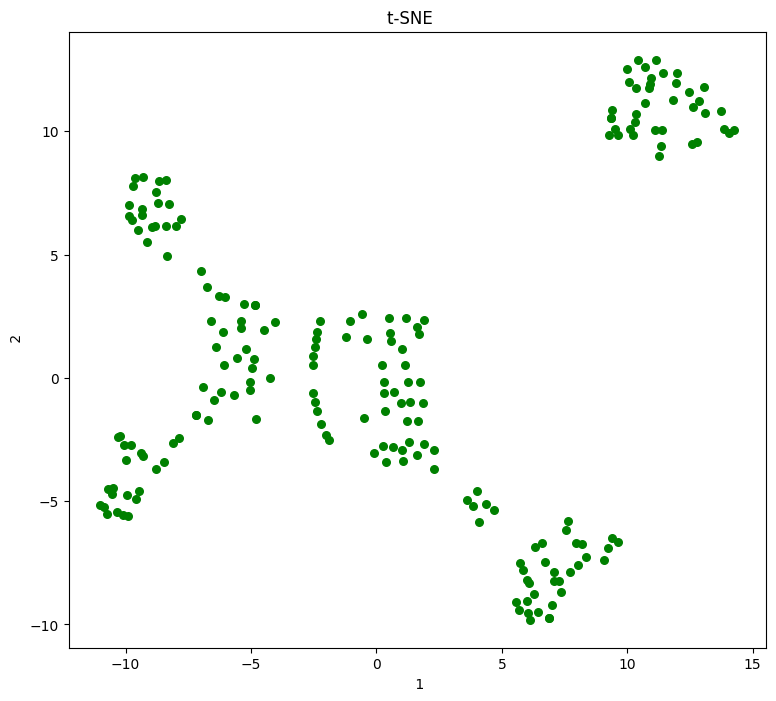

In [198]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne_orig = TSNE(n_components=2, random_state=42)
X_tsne_orig = tsne_orig.fit_transform(X_scaled)

plt.figure(figsize=(9, 8))
plt.scatter(X_tsne_orig[:, 0], X_tsne_orig[:, 1], c='green', s=30)
plt.title("t-SNE   ")
plt.xlabel(" 1")
plt.ylabel(" 2")
plt.show()


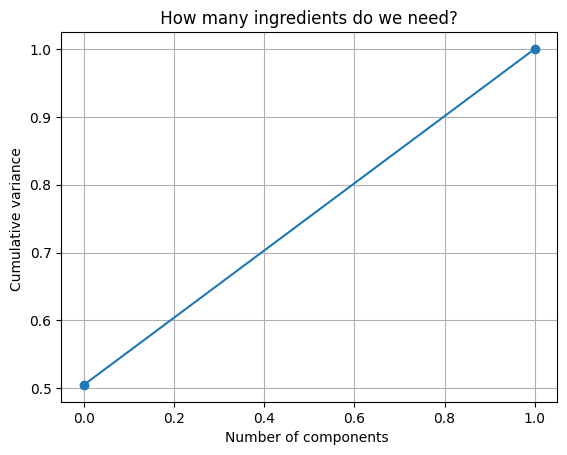

In [199]:
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of components ')
plt.ylabel('Cumulative variance ')
plt.title(' How many ingredients do we need? ')
plt.grid()
plt.show()


In [200]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


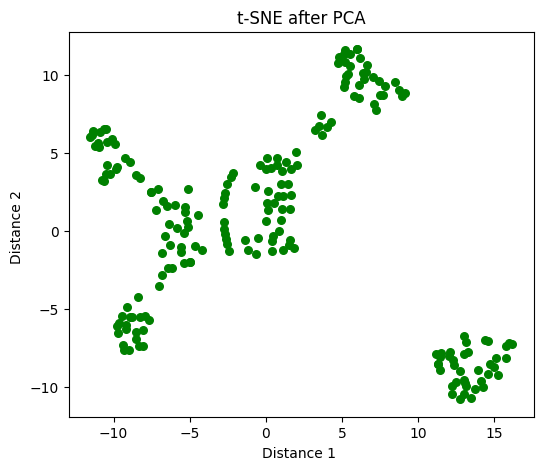

In [201]:
tsne_after_pca = TSNE(n_components=2, random_state=42)
X_tsne_pca = tsne_after_pca.fit_transform(X_pca)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c='green', s=30)
plt.title("t-SNE after PCA")
plt.xlabel("Distance 1 ")
plt.ylabel("Distance 2 ")
plt.show()
